In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_raw = pd.read_csv('/content/bfo_lit_df_master_20240125.csv')
df_raw.head(3)

,Unnamed: 0,recipe_id,url,doi,source_Bi,source_Bi_amount,source_Fe,source_Fe_amount,bi_fe_ratio,separate_hydrolysis,...,final_annealing_degC,atmosphere,reported_impurities,space_group,main_XRD_peaks,thin_film_thickness_nm,validation_KC,validation_VB,Validation_Notes,Extraction_Notes
0,0,1.0,https://link.springer.com/content/pdf/10.1007/...,10.1007/s00339-016-9628-3,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.10,NaN,...,550.0,O2,[],R3c,"(012), (104), (110)",NaN,NaN,completed,"RTA for intermediate annealing, assumed atmosp...","coating, prebake (280 5min), anneal (550 5min)..."
1,1,2.0,https://link.springer.com/article/10.1007/s108...,10.1007/s10853-014-8318-9,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.05,NaN,...,550.0,N2,[],R3c,"(102), (104), (110)",350.0,NaN,completed,NaN,Mn doping; solution prep described in 10.1063/...
2,2,3.0,https://www.researchgate.net/profile/Muniyandi...,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.10,NaN,...,600.0,air,['amorphous'],NaN,NaN,NaN,NaN,completed,NaN,"might want to delete, no pre-firing"


In [ ]:
df_raw.shape

(340, 62)

In [ ]:
df_raw['reported_impurities'].value_counts()

reported_impurities
[]                                                 251
['Bi2Fe4O9']                                        21
['Bi2O3']                                           11
['Fe2O3']                                            9
['Bi2Fe4O9', 'Bi25FeO39']                            8
['amorphous']                                        7
['Bi25FeO40']                                        4
['Bi-rich', 'Fe2O3', 'Bi2Fe4O9']                     3
['unknown']                                          3
['unspecified']                                      2
['Bi-rich']                                          2
['Bi36Fe2O57']                                       2
['Bi2O2.33', 'Bi25FeO40']                            2
['Bi2O3', 'unknown']                                 1
['Bi-rich', 'Fe2O3', 'Bi2Fe4O9', 'unknown']          1
['Bi2Fe4O7']                                         1
['Bi2O3', 'Fe0.942O']                                1
['Bi25FeO39', 'Bi2Fe4O9']                    

In [ ]:
df_raw['source_Bi'].value_counts()

source_Bi
bi_nitrate_pentahydrate    325
bi_acetate                   7
bi_oxyde                     1
Name: count, dtype: int64

In [ ]:
df_raw['source_Fe'].value_counts()

source_Fe
fe_nitrate_nonahydrate      318
fe_acetylacetonate            9
fe_pentanedionate             2
fe_pentethoxide               1
fe_citrate                    1
fe_tris_24pentanedionato      1
fe_acetate                    1
Name: count, dtype: int64

In [ ]:
df_raw['age_temp_degC'].value_counts()

age_temp_degC
25.0    34
80.0     1
55.0     1
60.0     1
Name: count, dtype: int64

In [ ]:
df_raw['solvent1'].value_counts()

solvent1
2_methoxyethanol        248
ethylene_glycol          20
2_ethoxyethanol           5
nn_dimethylformamide      3
ethanol                   1
propylene_glycol          1
trimethylene_glycol       1
water                     1
Name: count, dtype: int64

In [ ]:
df_raw['solvent2'].value_counts()

solvent2
ethylene_glycol         52
ethanol                  2
propionic_acid           2
nn_dimethylformamide     1
formamide                1
polyethylene_glycol      1
Name: count, dtype: int64

In [ ]:
df_raw['chelating_agent1'].value_counts()

chelating_agent1
acetic_acid      114
citric_acid       51
nitric_acid        5
acetylacetone      5
Name: count, dtype: int64

In [ ]:
df_raw['chelating_agent2'].value_counts()

chelating_agent2
acetylacetone     27
nitric_acid       13
citric_acid        8
acetic_acid        1
diethanolamine     1
Name: count, dtype: int64

In [ ]:
df_raw['chelating_agent3'].value_counts()

chelating_agent3
ammonium_hydroxide    12
citric_acid            1
Name: count, dtype: int64

In [ ]:
df_raw['surfactant'].value_counts()

surfactant
ethanolamine            36
ethylenediamine          1
PEO-PPO-PEO              1
polyvinylpyrrolidone     1
Name: count, dtype: int64

In [ ]:
df_raw['layer_annealing_degC'].value_counts()

layer_annealing_degC
550.0    43
600.0    21
500.0    16
650.0    12
640.0     7
525.0     6
700.0     3
850.0     3
750.0     3
450.0     3
715.0     3
400.0     2
685.0     1
730.0     1
745.0     1
520.0     1
580.0     1
Name: count, dtype: int64

cut-off 655 deg C

In [ ]:
df_raw["solvents"] = df_raw[['solvent1', 'solvent2']].stack().groupby(level=0).agg(' '.join)
#df_raw['solvent1'].fillna('') + df_raw['solvent2'].fillna('')

In [ ]:
df_raw["chelating_agents"] = df_raw[['chelating_agent1', 'chelating_agent2','chelating_agent3']].stack().groupby(level=0).agg(' '.join).fillna('')

In [ ]:
df_raw["chelating_agents"]

0              NaN
1      acetic_acid
2              NaN
3              NaN
4              NaN
          ...     
335            NaN
336            NaN
337            NaN
338            NaN
339            NaN
Name: chelating_agents, Length: 340, dtype: object

In [ ]:
df_raw["crystallinity"]="crystal"

In [ ]:
df_raw.loc[df_raw['reported_impurities'].str.contains("Bi*", na=False), "crystallinity"] = "crystal impure"
df_raw.loc[df_raw['reported_impurities'].str.contains("Fe*", na=False), "crystallinity"] = "crystal impure"
df_raw.loc[df_raw['reported_impurities'].str.contains("un*", na=False), "crystallinity"] = "crystal impure"

In [ ]:
df_raw.loc[df_raw['reported_impurities'].str.contains("amorphous", na=False), "crystallinity"] = "amorphous"

In [ ]:
df_raw["crystallinity"].value_counts()

crystallinity
crystal           251
crystal impure     80
amorphous           9
Name: count, dtype: int64

In [ ]:
df_raw["sources"] = df_raw[['source_Bi','source_Fe']].stack().groupby(level=0).agg(' '.join)

In [ ]:
df_raw["sources"].value_counts()

sources
bi_nitrate_pentahydrate fe_nitrate_nonahydrate      318
bi_nitrate_pentahydrate fe_acetylacetonate            6
bi_acetate fe_acetylacetonate                         3
bi_acetate fe_pentanedionate                          2
bi_acetate fe_pentethoxide                            1
bi_oxyde fe_citrate                                   1
bi_nitrate_pentahydrate fe_tris_24pentanedionato      1
bi_acetate fe_acetate                                 1
Name: count, dtype: int64

In [ ]:
df_raw["sources_sk"] = "NA"

In [ ]:
df_raw.loc[df_raw['sources'].str.contains("bi_nitrate_pentahydrate fe_nitrate_nonahydrate", na=False), "sources_sk"] = "Bi & Fe nitrates"
df_raw.loc[df_raw['sources'].str.contains("acet", na=False), "sources_sk"] = "other"
df_raw.loc[df_raw['sources'].str.contains("oxyde", na=False), "sources_sk"] = "other"
df_raw.loc[df_raw['sources'].str.contains("tris", na=False), "sources_sk"] = "other"

In [ ]:
df_raw["sources_sk"].value_counts()

sources_sk
Bi & Fe nitrates    318
other                15
NA                    7
Name: count, dtype: int64

In [ ]:
df_raw["solvents"].value_counts()

solvents
2_methoxyethanol                         224
ethylene_glycol                           52
2_methoxyethanol ethylene_glycol          19
2_ethoxyethanol                            5
nn_dimethylformamide                       3
2_methoxyethanol propionic_acid            2
2_methoxyethanol nn_dimethylformamide      1
ethanol ethylene_glycol                    1
propylene_glycol ethanol                   1
trimethylene_glycol                        1
2_methoxyethanol formamide                 1
water                                      1
ethanol                                    1
2_methoxyethanol polyethylene_glycol       1
Name: count, dtype: int64

In [ ]:
df_raw["solvents_sk"] = "NA"

In [ ]:
df_raw.loc[df_raw['solvents'].str.contains("o", na=False), "solvents_sk"] = "other"
df_raw.loc[df_raw['solvents'].str.contains("a", na=False), "solvents_sk"] = "other"
df_raw.loc[df_raw['solvents'].str.contains("ethylene_glycol", na=False), "solvents_sk"] = "ethylene glycol"
df_raw.loc[df_raw['solvents'].str.fullmatch("trimethylene_glycol", na=False), "solvents_sk"] = "other"
df_raw.loc[df_raw['solvents'].str.contains("2_methoxyethanol", na=False), "solvents_sk"] = "2-methoxyethanol"

In [ ]:
df_raw["solvents_sk"].value_counts()

solvents_sk
2-methoxyethanol    248
ethylene glycol      53
NA                   27
other                12
Name: count, dtype: int64

In [ ]:
df_raw["chelating_sk"] = "NA"

In [ ]:
df_raw["chelating_agents"].value_counts()

chelating_agents
acetic_acid                                   80
citric_acid                                   39
acetic_acid acetylacetone                     26
citric_acid nitric_acid ammonium_hydroxide    12
acetic_acid citric_acid                        6
acetylacetone                                  5
nitric_acid                                    3
nitric_acid citric_acid                        2
acetic_acid nitric_acid citric_acid            1
acetylacetone acetic_acid                      1
acetic_acid diethanolamine                     1
Name: count, dtype: int64

In [ ]:
df_raw.loc[df_raw['chelating_agents'].str.contains("acid", na=False), "chelating_sk"] = "other acid"
#df_raw.loc[df_raw['chelating_agents'].str.contains("citric_acid", na=False), "chelating_sk"] = "citric acid"
df_raw.loc[df_raw['chelating_agents'].str.contains("acetic_acid", na=False), "chelating_sk"] = "acetic acid"
df_raw.loc[df_raw['chelating_agents'].str.fullmatch("citric_acid", na=False), "chelating_sk"] = "citric acid"
df_raw.loc[df_raw['chelating_agents'].str.contains("nitric_acid", na=False), "chelating_sk"] = "nitric acid"

In [ ]:
df_raw["chelating_sk"].value_counts()

chelating_sk
NA             169
acetic acid    114
citric acid     39
nitric acid     18
Name: count, dtype: int64

In [ ]:
df_raw["dehydrating_agents"] = df_raw[['dehydrating_agent1', 'dehydrating_agent2']].stack().groupby(level=0).agg(' '.join)

In [ ]:
df_raw["dehydrating_agents"].value_counts()

dehydrating_agents
acetic_anhydride                        92
acetic_acid_glacial                     55
nn_dimethylformamide                     3
acetic_anhydride acetic_acid_glacial     1
formamide acetic_acid_glacial            1
acetone                                  1
Name: count, dtype: int64

In [ ]:
df_raw["dehydrating_sk"] = "NA"

In [ ]:
df_raw.loc[df_raw['dehydrating_agents'].str.contains("e", na=False), "dehydrating_sk"] = "other"
df_raw.loc[df_raw['dehydrating_agents'].str.contains("acetic_anhydride", na=False), "dehydrating_sk"] = "acetic anhydride"
df_raw.loc[df_raw['dehydrating_agents'].str.contains("acetic_acid_glacial", na=False), "dehydrating_sk"] = "acetic glacial"

In [ ]:
df_raw["dehydrating_sk"].value_counts()

dehydrating_sk
NA                  187
acetic anhydride     92
acetic glacial       57
other                 4
Name: count, dtype: int64

In [ ]:
df_raw["surfactant"].value_counts()

surfactant
ethanolamine            36
ethylenediamine          1
PEO-PPO-PEO              1
polyvinylpyrrolidone     1
Name: count, dtype: int64

In [ ]:
df_raw["surfactants_sk"] = "NA"

In [ ]:
df_raw.loc[df_raw['surfactant'].str.contains("e", na=False), "surfactants_sk"] = "ethanolamine or other"
df_raw.loc[df_raw['surfactant'].str.contains("O", na=False), "surfactants_sk"] = "ethanolamine or other"
df_raw.loc[df_raw['surfactant'].str.fullmatch("ethanolamine", na=False), "surfactants_sk"] = "ethanolamine or other"

In [ ]:
df_raw["surfactants_sk"].value_counts()

surfactants_sk
NA                       301
ethanolamine or other     39
Name: count, dtype: int64

In [ ]:
df_raw['summary'] = df_raw[['sources_sk', 'solvents_sk',
       'chelating_sk', 'dehydrating_sk',
       'surfactants_sk','crystallinity']].stack().groupby(level=0).agg(', '.join).fillna('')

In [ ]:
df_raw['summary'].value_counts()

summary
Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, NA, crystal             53
Bi & Fe nitrates, 2-methoxyethanol, acetic acid, NA, NA, crystal                  29
Bi & Fe nitrates, 2-methoxyethanol, citric acid, NA, NA, crystal                  27
Bi & Fe nitrates, 2-methoxyethanol, NA, NA, NA, crystal                           23
Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, NA, crystal impure      16
                                                                                  ..
Bi & Fe nitrates, NA, acetic acid, NA, NA, amorphous                               1
Bi & Fe nitrates, 2-methoxyethanol, acetic acid, acetic glacial, NA, amorphous     1
Bi & Fe nitrates, 2-methoxyethanol, NA, NA, ethanolamine or other, crystal         1
Bi & Fe nitrates, 2-methoxyethanol, NA, NA, ethanolamine or other, amorphous       1
other, 2-methoxyethanol, NA, NA, NA, amorphous                                     1
Name: count, Length: 61, dtype: int64

In [ ]:
dataset = df_raw['summary'].value_counts().to_dict()
dataset

{'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, NA, crystal': 53,
 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, NA, NA, crystal': 29,
 'Bi & Fe nitrates, 2-methoxyethanol, citric acid, NA, NA, crystal': 27,
 'Bi & Fe nitrates, 2-methoxyethanol, NA, NA, NA, crystal': 23,
 'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, NA, crystal impure': 16,
 'Bi & Fe nitrates, ethylene glycol, NA, NA, NA, crystal': 15,
 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, NA, NA, crystal impure': 14,
 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, acetic glacial, NA, crystal': 14,
 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, acetic glacial, NA, crystal impure': 11,
 'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, ethanolamine or other, crystal': 11,
 'Bi & Fe nitrates, NA, acetic acid, NA, NA, crystal': 10,
 'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic glacial, NA, crystal': 8,
 'Bi & Fe nitrates, ethylene glycol, nitric acid, NA, NA, crystal impure': 8

In [ ]:
list(dataset.values())

[53,
 29,
 27,
 23,
 16,
 15,
 14,
 14,
 11,
 11,
 10,
 8,
 8,
 7,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:

dataset.keys()

dict_keys(['Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, NA, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, citric acid, NA, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, NA, NA, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, NA, crystal impure', 'Bi & Fe nitrates, ethylene glycol, NA, NA, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, NA, NA, crystal impure', 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, acetic glacial, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, acetic acid, acetic glacial, NA, crystal impure', 'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic anhydride, ethanolamine or other, crystal', 'Bi & Fe nitrates, NA, acetic acid, NA, NA, crystal', 'Bi & Fe nitrates, 2-methoxyethanol, NA, acetic glacial, NA, crystal', 'Bi & Fe nitrates, ethylene glycol, nitric acid, NA, NA, crystal impure', 'NA, NA, NA, NA, NA, crystal', 'Bi & Fe nitrates, 

In [ ]:
salts = []
solvents = []
chelatings = []
dehydratings = []
surfactants = []
crystallinity = []
for key in dataset.keys():
  words = key.split(',')
  salts.append("salt: "+words[0])
  solvents.append("solvent: "+words[1])
  chelatings.append("chelating: "+words[2])
  dehydratings.append("dehydrating: "+words[3])
  surfactants.append("surfactant: "+words[4])
  crystallinity.append("crystallinity: "+words[5])
counts = list(dataset.values())

data = {"salt": salts,
    "solvent": solvents,
    "chelating": chelatings,
    "dehydrating": dehydratings,
    "surfactant": surfactants,
    "crystallinity": crystallinity,
    "counts": counts
}

df = pd.DataFrame(data)
df.head(5)

,salt,solvent,chelating,dehydrating,surfactant,crystallinity,counts
0,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: NA,dehydrating: acetic anhydride,surfactant: NA,crystallinity: crystal,53
1,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: acetic acid,dehydrating: NA,surfactant: NA,crystallinity: crystal,29
2,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: citric acid,dehydrating: NA,surfactant: NA,crystallinity: crystal,27
3,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: NA,dehydrating: NA,surfactant: NA,crystallinity: crystal,23
4,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: NA,dehydrating: acetic anhydride,surfactant: NA,crystallinity: crystal impure,16


In [ ]:
salts = []
solvents = []
chelatings = []
dehydratings = []
surfactants = []
crystallinity = []
for key in dataset.keys():
  words = key.split(',')
  salts.append("salt: other" if words[0] == "other" else words[0])
  solvents.append("solv: other" if words[1] == "other" else words[1])
  chelatings.append("chel: other" if words[2] == "other" else words[2])
  dehydratings.append("dehydr: other" if words[3] == "other" else words[3])
  surfactants.append("surf: other" if words[4] == "other" else words[4])
  crystallinity.append("crystallinity: other" if words[5] == "other" else words[5])
counts = list(dataset.values())

data = {"salt": salts,
    "solvent": solvents,
    "chelating": chelatings,
    "dehydrating": dehydratings,
    "surfactant": surfactants,
    "crystallinity": crystallinity,
    "counts": counts
}

df = pd.DataFrame(data)
df.head(5)

,salt,solvent,chelating,dehydrating,surfactant,crystallinity,counts
0,Bi & Fe nitrates,2-methoxyethanol,NA,acetic anhydride,NA,crystal,53
1,Bi & Fe nitrates,2-methoxyethanol,acetic acid,NA,NA,crystal,29
2,Bi & Fe nitrates,2-methoxyethanol,citric acid,NA,NA,crystal,27
3,Bi & Fe nitrates,2-methoxyethanol,NA,NA,NA,crystal,23
4,Bi & Fe nitrates,2-methoxyethanol,NA,acetic anhydride,NA,crystal impure,16


In [ ]:
def replace_na_with_none(value):
    if isinstance(value, str) and "NA" in value:
        return None  # Or use pd.NA for pandas' NA value
    else:
        return value

df = df.applymap(replace_na_with_none)

df.head(5)

,salt,solvent,chelating,dehydrating,surfactant,crystallinity,counts
0,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,None,dehydrating: acetic anhydride,None,crystallinity: crystal,53
1,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: acetic acid,None,None,crystallinity: crystal,29
2,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,chelating: citric acid,None,None,crystallinity: crystal,27
3,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,None,None,None,crystallinity: crystal,23
4,salt: Bi & Fe nitrates,solvent: 2-methoxyethanol,None,dehydrating: acetic anhydride,None,crystallinity: crystal impure,16


Finished data preparation

In [ ]:
# Preprocess the data for the Sankey diagram
sankey_preprocessed = []

# Iterate through each row to construct the paths
for index, row in df.iterrows():
    # Filter out None values and exclude the 'counts' column for path construction
    filtered_row = row.dropna().drop('counts')
    path = filtered_row.tolist()

    # Iterate through the path to create source-target pairs
    for i in range(len(path) - 1):
        sankey_preprocessed.append((path[i], path[i + 1], row['counts']))

# Convert the list of tuples into a DataFrame
sankey_df = pd.DataFrame(sankey_preprocessed, columns=['source', 'target', 'value'])

# Aggregate counts for identical source-target pairs
sankey_df = sankey_df.groupby(['source', 'target']).sum().reset_index()

sankey_df

,source,target,value
0,chelating: acetic acid,crystallinity: amorphous,3
1,chelating: acetic acid,crystallinity: crystal,44
2,chelating: acetic acid,crystallinity: crystal impure,17
3,chelating: acetic acid,dehydrating: acetic anhydride,5
4,chelating: acetic acid,dehydrating: acetic glacial,38
5,chelating: acetic acid,dehydrating: other,1
6,chelating: acetic acid,surfactant: ethanolamine or other,6
7,chelating: citric acid,crystallinity: crystal,34
8,chelating: citric acid,crystallinity: crystal impure,2
9,chelating: citric acid,dehydrating: other,3


#Sankey diagram
https://medium.com/@cbkwgl/sankey-diagrams-in-python-fc9673465ccb
https://plotly.com/python/sankey-diagram/

EXAMPLE:

In [ ]:
sankey_data = sankey_df

My data:

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Map the unique sources and targets to integers
unique_nodes = pd.Index(pd.concat([sankey_data['source'], sankey_data['target']], ignore_index=True).unique())

# Replace the sources and targets with their corresponding unique integer identifiers
sankey_data['source_id'] = sankey_data['source'].apply(lambda x: unique_nodes.get_loc(x))
sankey_data['target_id'] = sankey_data['target'].apply(lambda x: unique_nodes.get_loc(x))

In [ ]:
sankey_data

,source,target,value,source_id,target_id
0,chelating: acetic acid,crystallinity: amorphous,3,0,12
1,chelating: acetic acid,crystallinity: crystal,44,0,13
2,chelating: acetic acid,crystallinity: crystal impure,17,0,14
3,chelating: acetic acid,dehydrating: acetic anhydride,5,0,3
4,chelating: acetic acid,dehydrating: acetic glacial,38,0,4
5,chelating: acetic acid,dehydrating: other,1,0,5
6,chelating: acetic acid,surfactant: ethanolamine or other,6,0,11
7,chelating: citric acid,crystallinity: crystal,34,1,13
8,chelating: citric acid,crystallinity: crystal impure,2,1,14
9,chelating: citric acid,dehydrating: other,3,1,5


In [ ]:
import plotly

In [ ]:
import numpy as np
import math

def hex2rgb(hex_code):
    h = hex_code.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

def rgb2hex(color):
    [r,g,b] = color
    rgb = (int(np.round(255*r)), int(np.round(255*g)), int(np.round(255*b)))
    return '#%02x%02x%02x' % rgb

def tan_sum(p,c):
  return math.atan(math.tan(c*math.pi/2)+math.tan(p*math.pi/2))*2/math.pi

def lighter(p, rgb_color):
  (r,g,b) = rgb_color
  return (tan_sum(p,r), tan_sum(p,g), tan_sum(p,b))

def lighter_hex(p,hex_color):
  rgb_color = hex2rgb(hex_color)
  rgb_color_lighter = lighter(p,rgb_color)
  hex_ligher = rgb2hex(rgb_color_lighter)
  return hex_ligher

In [ ]:
len(unique_nodes)

15

In [ ]:
unique_nodes

Index(['chelating:  acetic acid', 'chelating:  citric acid',
       'chelating:  nitric acid', 'dehydrating:  acetic anhydride',
       'dehydrating:  acetic glacial', 'dehydrating:  other',
       'salt: Bi & Fe nitrates', 'salt: other', 'solvent:  2-methoxyethanol',
       'solvent:  ethylene glycol', 'solvent:  other',
       'surfactant:  ethanolamine or other', 'crystallinity:  amorphous',
       'crystallinity:  crystal', 'crystallinity:  crystal impure'],
      dtype='object')

In [ ]:
unique_nodes_upd = [word if ": other" in word else word.split(':')[1].strip() for word in unique_nodes]
unique_nodes_upd

['acetic acid',
 'citric acid',
 'nitric acid',
 'acetic anhydride',
 'acetic glacial',
 'other',
 'Bi & Fe nitrates',
 'salt: other',
 '2-methoxyethanol',
 'ethylene glycol',
 'other',
 'ethanolamine or other',
 'amorphous',
 'crystal',
 'crystal impure']

In [ ]:
node_colors = ['#7fcdbb', # chelating: acetic acid # green # pale
               '#31a354', # chelating: citric acid # green # dark
               '#a1d99b', # chelating: nitric acid # green # med
               '#fec44f', # dehydrating: acetic anhydride # orange # light
               '#fdae6b', # dehydrating: acetic glacial # orange # med
               '#e6550d', # dehydrating: other # orange # dark
               '#f0f0f0', # salt: Bi & Fe nitrates # gray # light
               '#bdbdbd', # salt: other # gray # med
               '#43a2ca', # solvent: 2-methoxyethanol # blue # light
               '#9ecae1', # solvent: ethylene glycol # blue # med
               '#3182bd', # solvent: other # blue # dark
               '#c994c7', # surfactant: ethanolamine or other # pink # dark
               '#756bb1', # crystallinity: amorphous # purple # dark
               '#efedf5', # crystallinity: crystal # purple # light
               '#bcbddc'] # crystallinity: crystal impure # purple # med

In [ ]:
#node_colors
"""
0 chelating: acetic acid
1 chelating: citric acid
2 chelating: nitric acid
3 dehydrating: acetic anhydride
4 dehydrating: acetic glacial
5 dehydrating: other
6 salt: Bi & Fe nitrates
7 salt: other
8 solvent: 2-methoxyethanol
9 solvent: ethylene glycol
10 solvent: other
11 surfactant: ethanolamine or other
12 crystallinity: amorphous
13 crystallinity: crystal
14 crystallinity: crystal impure

node_colors = [
    '#565656',
    '#1CFFCE',
    '#FEAF16',
    '#325A9B',
    '#782AB6',
    '#F6222E',
    '#AA0DFE',
    '#85660D',
    '#3283FE',
    '#1616A7',
    '#2ED9FF',
    '#1C8356',
    '#DEA0FD',
    '#FBE426',
    '#FEAF16'
]
"""

"\n0 chelating: acetic acid\n1 chelating: citric acid\t\n2 chelating: other acid\n3 dehydrating: acetic anhydride\n4 dehydrating: acetic glacial\t\n5 dehydrating: other\t\n6 salt: Bi & Fe nitrates\n7 salt: other\n8 solvent: 2-methoxyethanol\n9 solvent: ethylene glycol\n10 solvent: other\t\n11 surfactant: ethanolamine or other\n12 crystallinity: amorphous\t\n13 crystallinity: crystal\n14 crystallinity: crystal impure\n\nnode_colors = [\n    '#565656',\n    '#1CFFCE',\n    '#FEAF16',\n    '#325A9B',\n    '#782AB6',\n    '#F6222E',\n    '#AA0DFE',\n    '#85660D',\n    '#3283FE',\n    '#1616A7',\n    '#2ED9FF',\n    '#1C8356',\n    '#DEA0FD',\n    '#FBE426',\n    '#FEAF16'\n]\n"

In [ ]:
import numpy as np

# Generate distinct colors for nodes
np.random.seed(2)  # For reproducibility
#node_colors = np.random.choice(list(plotly.colors.qualitative.Light24), len(unique_nodes), replace=False)

# Generate gradient colors for links based on source node for variety
link_colors = [lighter_hex(0.2,node_colors[src]) for src in sankey_data['source_id']]

# Update the Sankey diagram with colors for nodes and links
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=50,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_nodes_upd,
        color=node_colors  # Updated colors for nodes
    ),
    link=dict(
        source=sankey_data['source_id'],
        target=sankey_data['target_id'],
        value=sankey_data['value'],
        color=link_colors  # Updated colors for links
    ))])

fig.update_layout(title_text="BFO sol-gel precursors", font_size=30)
fig.show()

https://colorbrewer2.org/#type=sequential&scheme=PuBuGn&n=3

In [ ]:
# Filter the dataframe to include only rows where `source` contains "solvent" and `target` contains "crystallinity"
subdataframe = sankey_data[(sankey_data['source'].str.contains("solvent")) & (sankey_data['target'].str.contains("crystallinity"))]

# Display the resulting subdataframe
print(subdataframe)

                        source                          target  value  \
37  solvent:  2-methoxyethanol       crystallinity:  amorphous      2   
38  solvent:  2-methoxyethanol         crystallinity:  crystal     26   
39  solvent:  2-methoxyethanol  crystallinity:  crystal impure      2   
46   solvent:  ethylene glycol         crystallinity:  crystal     15   
47   solvent:  ethylene glycol  crystallinity:  crystal impure      2   

    source_id  target_id  
37          8         12  
38          8         13  
39          8         14  
46          9         13  
47          9         14  


In [ ]:
subdataframe

,source,target,value,source_id,target_id
37,solvent: 2-methoxyethanol,crystallinity: amorphous,2,8,12
38,solvent: 2-methoxyethanol,crystallinity: crystal,26,8,13
39,solvent: 2-methoxyethanol,crystallinity: crystal impure,2,8,14
46,solvent: ethylene glycol,crystallinity: crystal,15,9,13
47,solvent: ethylene glycol,crystallinity: crystal impure,2,9,14


In [ ]:
def get_count_df(data=sankey_data, text="crystallinity: crystal"):
  # Filter the dataframe for rows where `target` is exactly "crystallinity: crystal"
  filtered_data = data[data['target'] == text]

  # Calculate the sum of the `value` column
  total_value = filtered_data['value'].sum()

  # Print the result
  print(f"Total value for {text}:", total_value)
  return total_value

In [ ]:
from collections import Counter
cr_keys = list(Counter(subdataframe['target'].values).keys())
print(cr_keys)

['crystallinity:  amorphous', 'crystallinity:  crystal', 'crystallinity:  crystal impure']


In [ ]:
solv_cr = [get_count_df(subdataframe, cr_key) for cr_key in cr_keys]
print(solv_cr)
[round(sc/sum(solv_cr),2) for sc in solv_cr]

Total value for crystallinity:  amorphous: 2
Total value for crystallinity:  crystal: 41
Total value for crystallinity:  crystal impure: 4
[2, 41, 4]


[0.04, 0.87, 0.09]

In [ ]:
tot_cr = [get_count_df(sankey_data, cr_key) for cr_key in cr_keys]
print(tot_cr)
[round(tc/sum(tot_cr),2) for tc in tot_cr]

Total value for crystallinity:  amorphous: 9
Total value for crystallinity:  crystal: 244
Total value for crystallinity:  crystal impure: 80
[9, 244, 80]


[0.03, 0.73, 0.24]

In [ ]:
import matplotlib.pyplot as plt

def get_pie(labels,sizes,colors,title, save_path=None):
    # Labels and sizes for the pie chart
    #labels = list(frequency.keys())

    #sizes = list(frequency.values())

    #colors = [
    #           '#7fcdbb', # chelating: acetic acid # green # pale
    #           '#c994c7', # surfactant: ethanolamine or other # pink # dark
    #           '#bcbddc', # crystallinity: crystal impure # purple # med
    #           '#fdae6b', # dehydrating: acetic glacial # orange # med
    #]
    #def autopct_func(pct):
    #    return f'{int(round(pct))}%'
    # Creating the ring (donut) chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, startangle=90, colors=colors,
            wedgeprops=dict(width=0.6), textprops={'fontsize': 36}, labeldistance=0.8)
    plt.text(0, 0, title, ha='center', va='center', fontsize=48, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    # Display the chart
    plt.show()

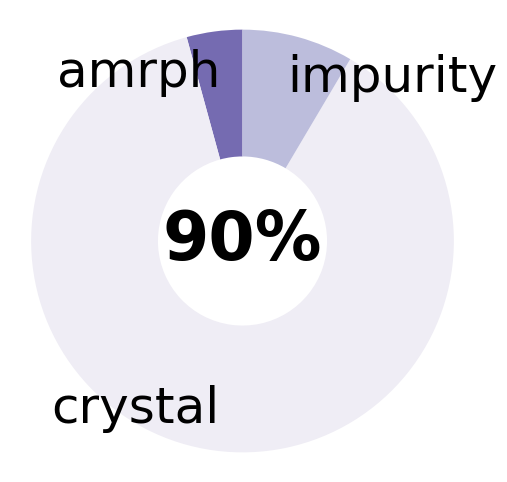

In [ ]:
labels = ['amrph', 'crystal', 'impurity']
colors = ['#756bb1', # crystallinity: amorphous # purple # dark
               '#efedf5', # crystallinity: crystal # purple # light
               '#bcbddc'] # crystallinity: crystal impure # purple # med
get_pie(labels,solv_cr,colors,"90%", "sakley_ap_solvent_cryst.png")

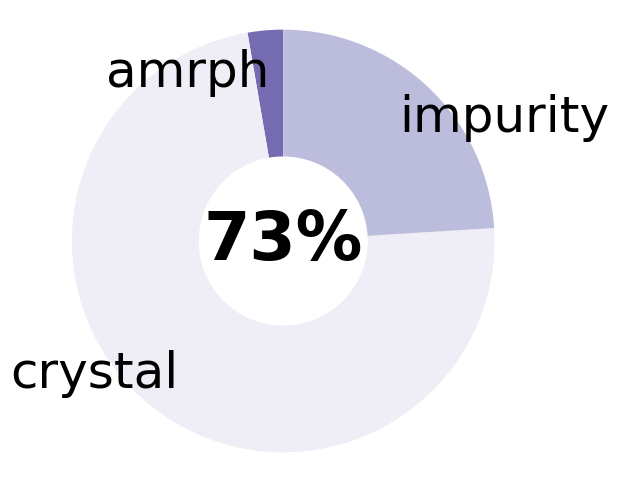

In [ ]:
labels = ['amrph', 'crystal', 'impurity']
colors = ['#756bb1', # crystallinity: amorphous # purple # dark
               '#efedf5', # crystallinity: crystal # purple # light
               '#bcbddc'] # crystallinity: crystal impure # purple # med
get_pie(labels,tot_cr,colors,"73%", "sakley_ap_tot_cryst.png")

In [ ]:
# Filter the dataframe to include only rows where `source` contains "solvent" and `target` contains "crystallinity"
subdataframe = sankey_data[(sankey_data['source'].str.contains("citric")) & (sankey_data['target'].str.contains("crystallinity"))]

# Display the resulting subdataframe
print(subdataframe)

                    source                          target  value  source_id  \
7  chelating:  citric acid         crystallinity:  crystal     34          1   
8  chelating:  citric acid  crystallinity:  crystal impure      2          1   

   target_id  
7         13  
8         14  


In [ ]:
che_cr = [get_count_df(subdataframe, cr_key) for cr_key in cr_keys]
print(che_cr)
[round(sc/sum(che_cr),2) for sc in che_cr]

Total value for crystallinity:  amorphous: 0
Total value for crystallinity:  crystal: 34
Total value for crystallinity:  crystal impure: 2
[0, 34, 2]


[0.0, 0.94, 0.06]

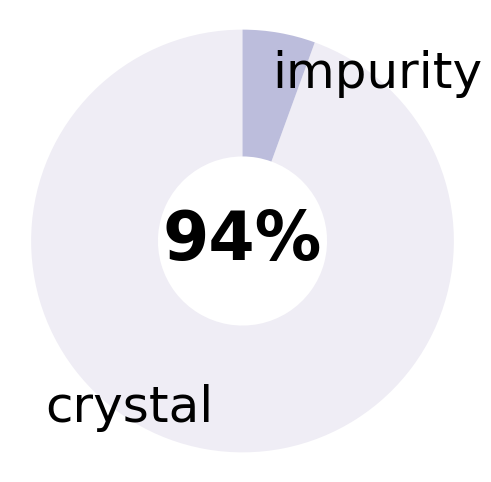

In [ ]:
labels = ['', 'crystal', 'impurity']
colors = ['#756bb1', # crystallinity: amorphous # purple # dark
               '#efedf5', # crystallinity: crystal # purple # light
               '#bcbddc'] # crystallinity: crystal impure # purple # med
get_pie(labels,che_cr,colors,"94%", "sakley_ap_citric_cryst.png")

In [ ]:
# Filter the dataframe to include only rows where `source` contains "solvent" and `target` contains "crystallinity"
subdataframe = sankey_data[(sankey_data['source'].str.contains("acetic")) & (sankey_data['target'].str.contains("crystallinity"))]

# Display the resulting subdataframe
print(subdataframe)

                            source                          target  value  \
0          chelating:  acetic acid       crystallinity:  amorphous      3   
1          chelating:  acetic acid         crystallinity:  crystal     44   
2          chelating:  acetic acid  crystallinity:  crystal impure     17   
13  dehydrating:  acetic anhydride       crystallinity:  amorphous      2   
14  dehydrating:  acetic anhydride         crystallinity:  crystal     53   
15  dehydrating:  acetic anhydride  crystallinity:  crystal impure     17   
17    dehydrating:  acetic glacial       crystallinity:  amorphous      1   
18    dehydrating:  acetic glacial         crystallinity:  crystal     33   
19    dehydrating:  acetic glacial  crystallinity:  crystal impure     20   

    source_id  target_id  
0           0         12  
1           0         13  
2           0         14  
13          3         12  
14          3         13  
15          3         14  
17          4         12  
18          4

In [ ]:
che_cr = [get_count_df(subdataframe, cr_key) for cr_key in cr_keys]
print(che_cr)
[round(sc/sum(che_cr),2) for sc in che_cr]

Total value for crystallinity:  amorphous: 6
Total value for crystallinity:  crystal: 130
Total value for crystallinity:  crystal impure: 54
[6, 130, 54]


[0.03, 0.68, 0.28]

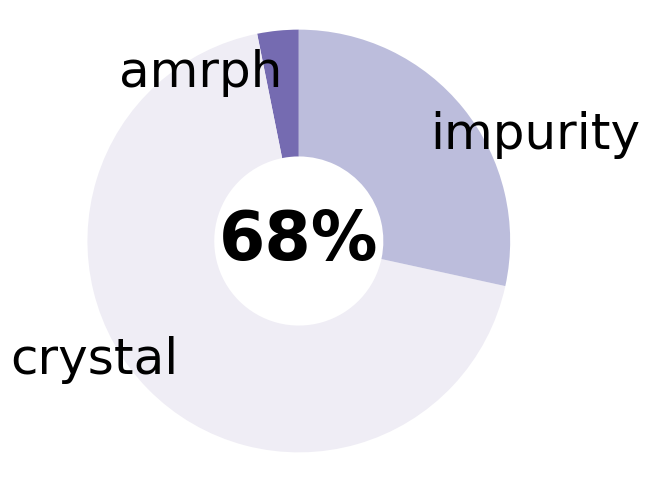

In [ ]:
labels = ['amrph', 'crystal', 'impurity']
colors = ['#756bb1', # crystallinity: amorphous # purple # dark
               '#efedf5', # crystallinity: crystal # purple # light
               '#bcbddc'] # crystallinity: crystal impure # purple # med
get_pie(labels,che_cr,colors,"68%", "sakley_ap_acetic_cryst.png")